In [13]:
import ROOT as R
from imp import reload

import tools
reload(tools)

ABS = tools.ABS 
ComparePU = tools.ComparePU
ComparePU_calos_all = tools.ComparePU_calos_all


R.gStyle.SetErrorX(0)
R.gStyle.SetOptStat(0)
R.gStyle.SetOptFit(1111)


 FCN=156.744 FROM MINOS     STATUS=SUCCESSFUL      2 CALLS          43 TOTAL
                     EDM=1.1212e-17    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           9.99018e-01   1.22437e-03   1.22437e-03  -3.86762e-06


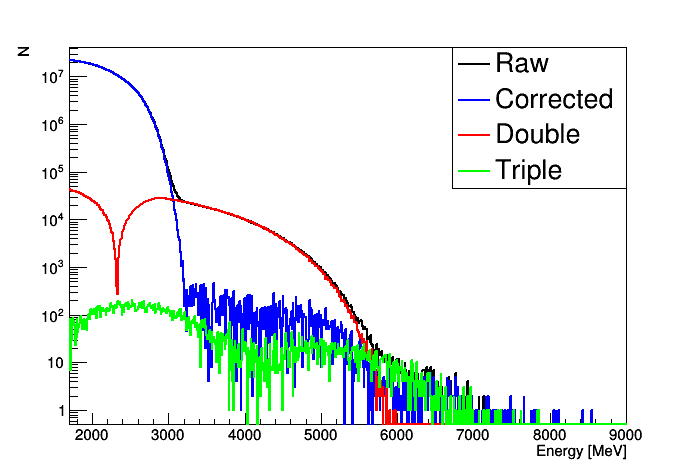

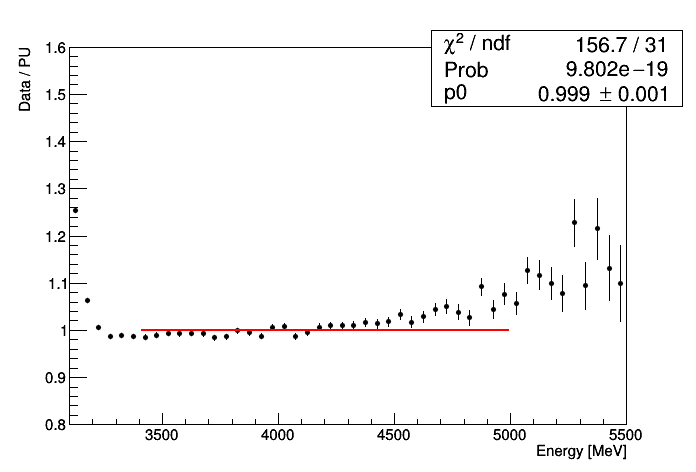

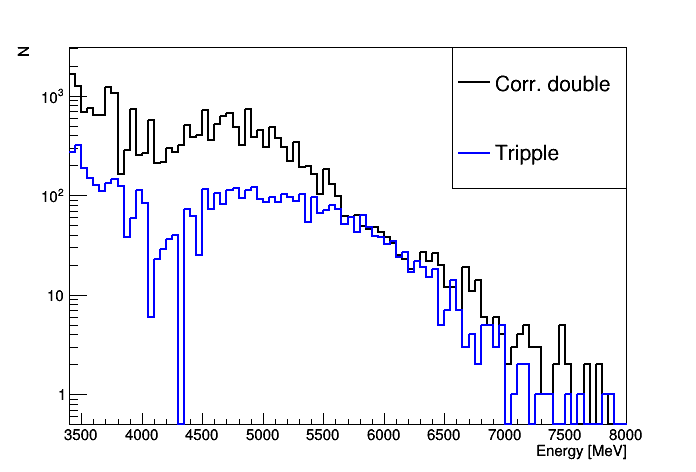

In [26]:
f = R.TFile('../data/nominal_fit/Run4U_Tpu_seedscan_fully149_2.78.root','read')

raw = f.Get('energy_raw').Clone()
corr = f.Get('subs_e').Clone()
pu_d = f.Get('pileup_e_double').Clone()
pu_t = f.Get('pileup_e_tri').Clone()

hists_e = [raw,corr,pu_d,pu_t]

cs = ComparePU(hists_e)


 FCN=19.0519 FROM MINOS     STATUS=SUCCESSFUL      2 CALLS          43 TOTAL
                     EDM=1.55519e-18    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.00231e+00   1.07642e-03   1.07642e-03  -1.63842e-06


Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


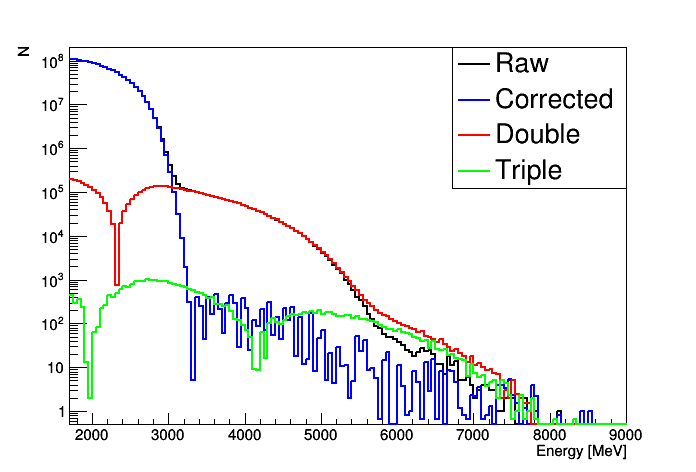

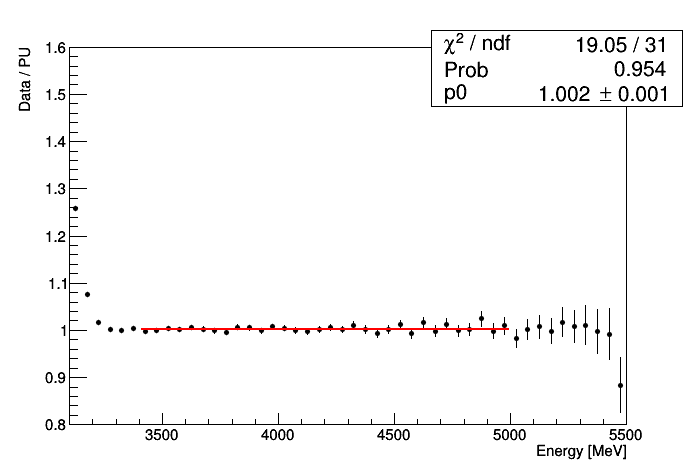

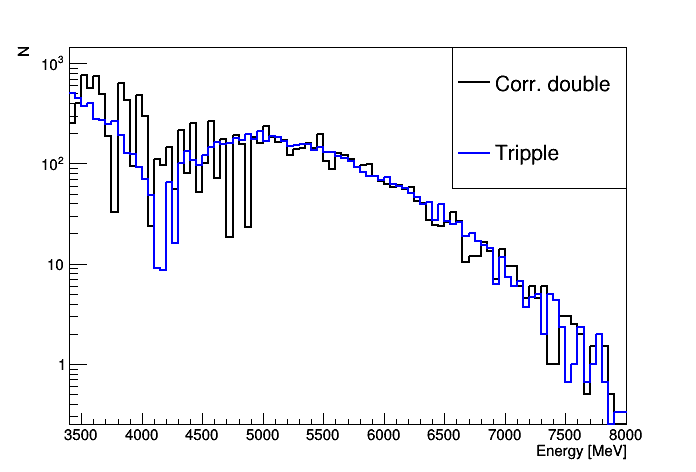

In [27]:
f_emp = R.TFile('/Users/cheng/WorkRun4/data/nominal_fit/Run4U_empirical_nominal.root')

raw = f_emp.Get('topDir/Iter0/RawHists/RawHist/rawTimesAndEnergies').Clone()

pu_d = f_emp.Get('topDir/Iter0/EmpiricalPileupHists/Added/addedPileupTimesAndEnergies_1stOrder').Clone()
pu_t = f_emp.Get('topDir/Iter0/EmpiricalPileupHists/Added/addedPileupTimesAndEnergies_2ndOrder').Clone()

corr = raw.Clone()
corr.Add(pu_d,-1)
corr.Add(pu_t,-1)
hists_2d = [raw,corr,pu_d,pu_t]
names = ['Raw','Corrected','Double','Triple']

hists = []
for n in range(4):
    t_min, t_max = hists_2d[n].GetXaxis().FindBin(30e3),hists_2d[n].GetXaxis().FindBin(600e3)
    h_1d = hists_2d[n].ProjectionY(names[n]+'Py',t_min,t_max)
    hists.append(h_1d)
    
cs = ComparePU(hists)
    

40000.0 400000.0
269 2681
40000.0 400000.0
269 2681


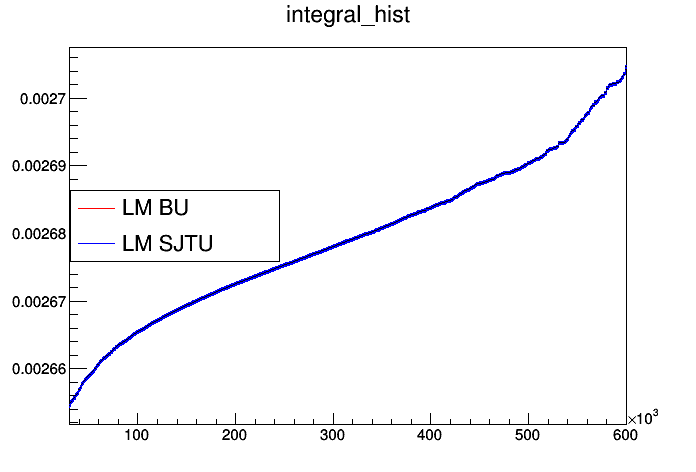

In [68]:
f_lm = R.TFile('/Users/cheng/WorkRun4/data/nominal_fit/Run4U_lm_int_sjtu.root','read')
f_lm_emp = R.TFile('/Users/cheng/WorkRun4/data/nominal_fit/Run4U_lm_int_bu.root','read')

lm_int = f_lm.Get('integral_hist').Clone()
lm_int_emp = f_lm_emp.Get('integral_hist').Clone()

colors  = [R.kRed,R.kBlue]
names = ['LM BU','LM SJTU']
n = 0

c = R.TCanvas()
scales = [1.e3,1.e3]
leg = R.TLegend()
for h in [lm_int_emp,lm_int]:
    h.SetLineColor(colors[n])
    h.SetStats(0)
    print (40*scales[n],400*scales[n])
    print (h.GetXaxis().FindBin(40*scales[n]),h.GetXaxis().FindBin(400*scales[n]))
    inte = h.Integral(269,4000)
    h.Scale(10./inte)
    leg.AddEntry(h,names[n],'l')
    h.GetXaxis().SetRangeUser(30*scales[n],600*scales[n])
    
    h.SetLineColor(colors[n])
    h.SetLineWidth(1)
    h.Draw('esame')
    n+=1
leg.Draw()
c.Draw()

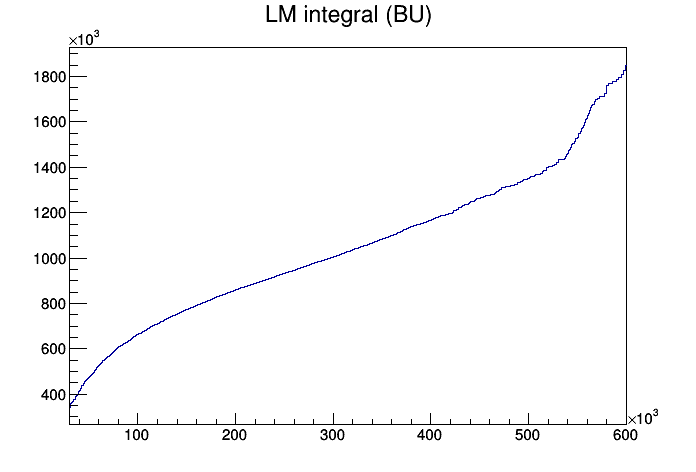

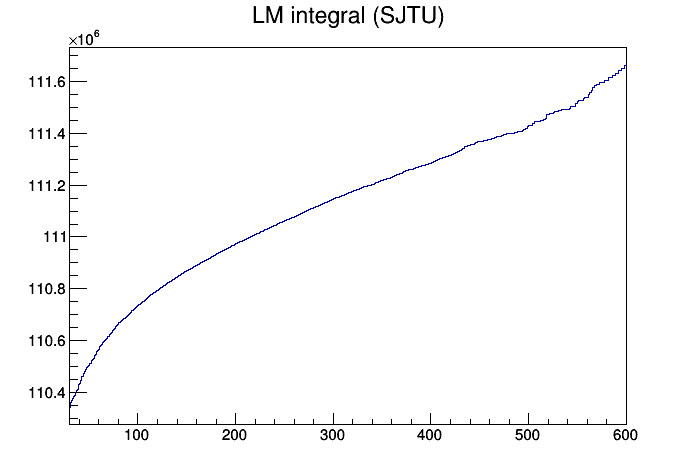

In [75]:

f_lm_bu = R.TFile('/Users/cheng/WorkRun4/data/nominal_fit/gm2pro_daq_offline_dqc_run4U_5307A_makeBULostMuons_gridRun.root','read')
f_lm_sjtu = R.TFile('/Users/cheng/WorkRun4/data/nominal_fit/Run4U_lm_int_resub.root','read')

h_bu = f_lm_bu.Get('integral_hist')
h_sjtu = f_lm_sjtu.Get('integral_hist')

c1 = R.TCanvas()
h_bu.SetStats(0)
h_bu.GetXaxis().SetRangeUser(30e3,600e3)
h_bu.SetTitle('LM integral (BU)')
h_bu.Draw()
c1.Draw()

c2 = R.TCanvas()
h_sjtu.SetStats(0)
h_sjtu.GetXaxis().SetRangeUser(30,600)
h_sjtu.SetTitle('LM integral (SJTU)')
h_sjtu.Draw()
c2.Draw()

In [8]:
f_emp = R.TFile('/Users/cheng/WorkRun4/data/nominal_fit/Run4U_empirical_nominal.root')
hists_calos = []

for n in range(1,25):
    raw = f_emp.Get('topDir/Iter0/RawHists/caloRawHists/caloRawTimesAndEnergies_Calo%s'%(n)).Clone()
    pu_d = f_emp.Get('topDir/Iter0/EmpiricalPileupHists/Calos/Calo%s/caloPileupTimesAndEnergies_1stOrder'%(n)).Clone()
    pu_t = f_emp.Get('topDir/Iter0/EmpiricalPileupHists/Calos/Calo%s/caloPileupTimesAndEnergies_2ndOrder'%(n)).Clone()
    corr = raw.Clone()
    corr.Add(pu_d,-1)
    corr.Add(pu_t,-1)
    hists_e = []
    hists_2d = [raw,corr,pu_d,pu_t]
    m = 0
    for h in hists_2d:        
        t_min, t_max = h.GetXaxis().FindBin(30e3),h.GetXaxis().FindBin(600e3)
        h_1d = h.ProjectionY('Py%s_calo%s'%(m,n),t_min,t_max)
        m+=1
        hists_e.append(h_1d)

    hists_calos.append(hists_e)

 FCN=20.3354 FROM MINOS     STATUS=SUCCESSFUL      2 CALLS          43 TOTAL
                     EDM=1.35576e-18    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           9.97948e-01   4.85521e-03   4.85521e-03  -3.39154e-07
 FCN=25.7674 FROM MINOS     STATUS=SUCCESSFUL      2 CALLS          43 TOTAL
                     EDM=2.91452e-22    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           9.99247e-01   5.15125e-03   5.15125e-03  -4.68690e-09
 FCN=24.7385 FROM MINOS     STATUS=SUCCESSFUL      2 CALLS          29 TOTAL
                     EDM=2.50282e-16    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE

Warning in <TCanvas::Constructor>: Deleting canvas with same name: 0
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already cre

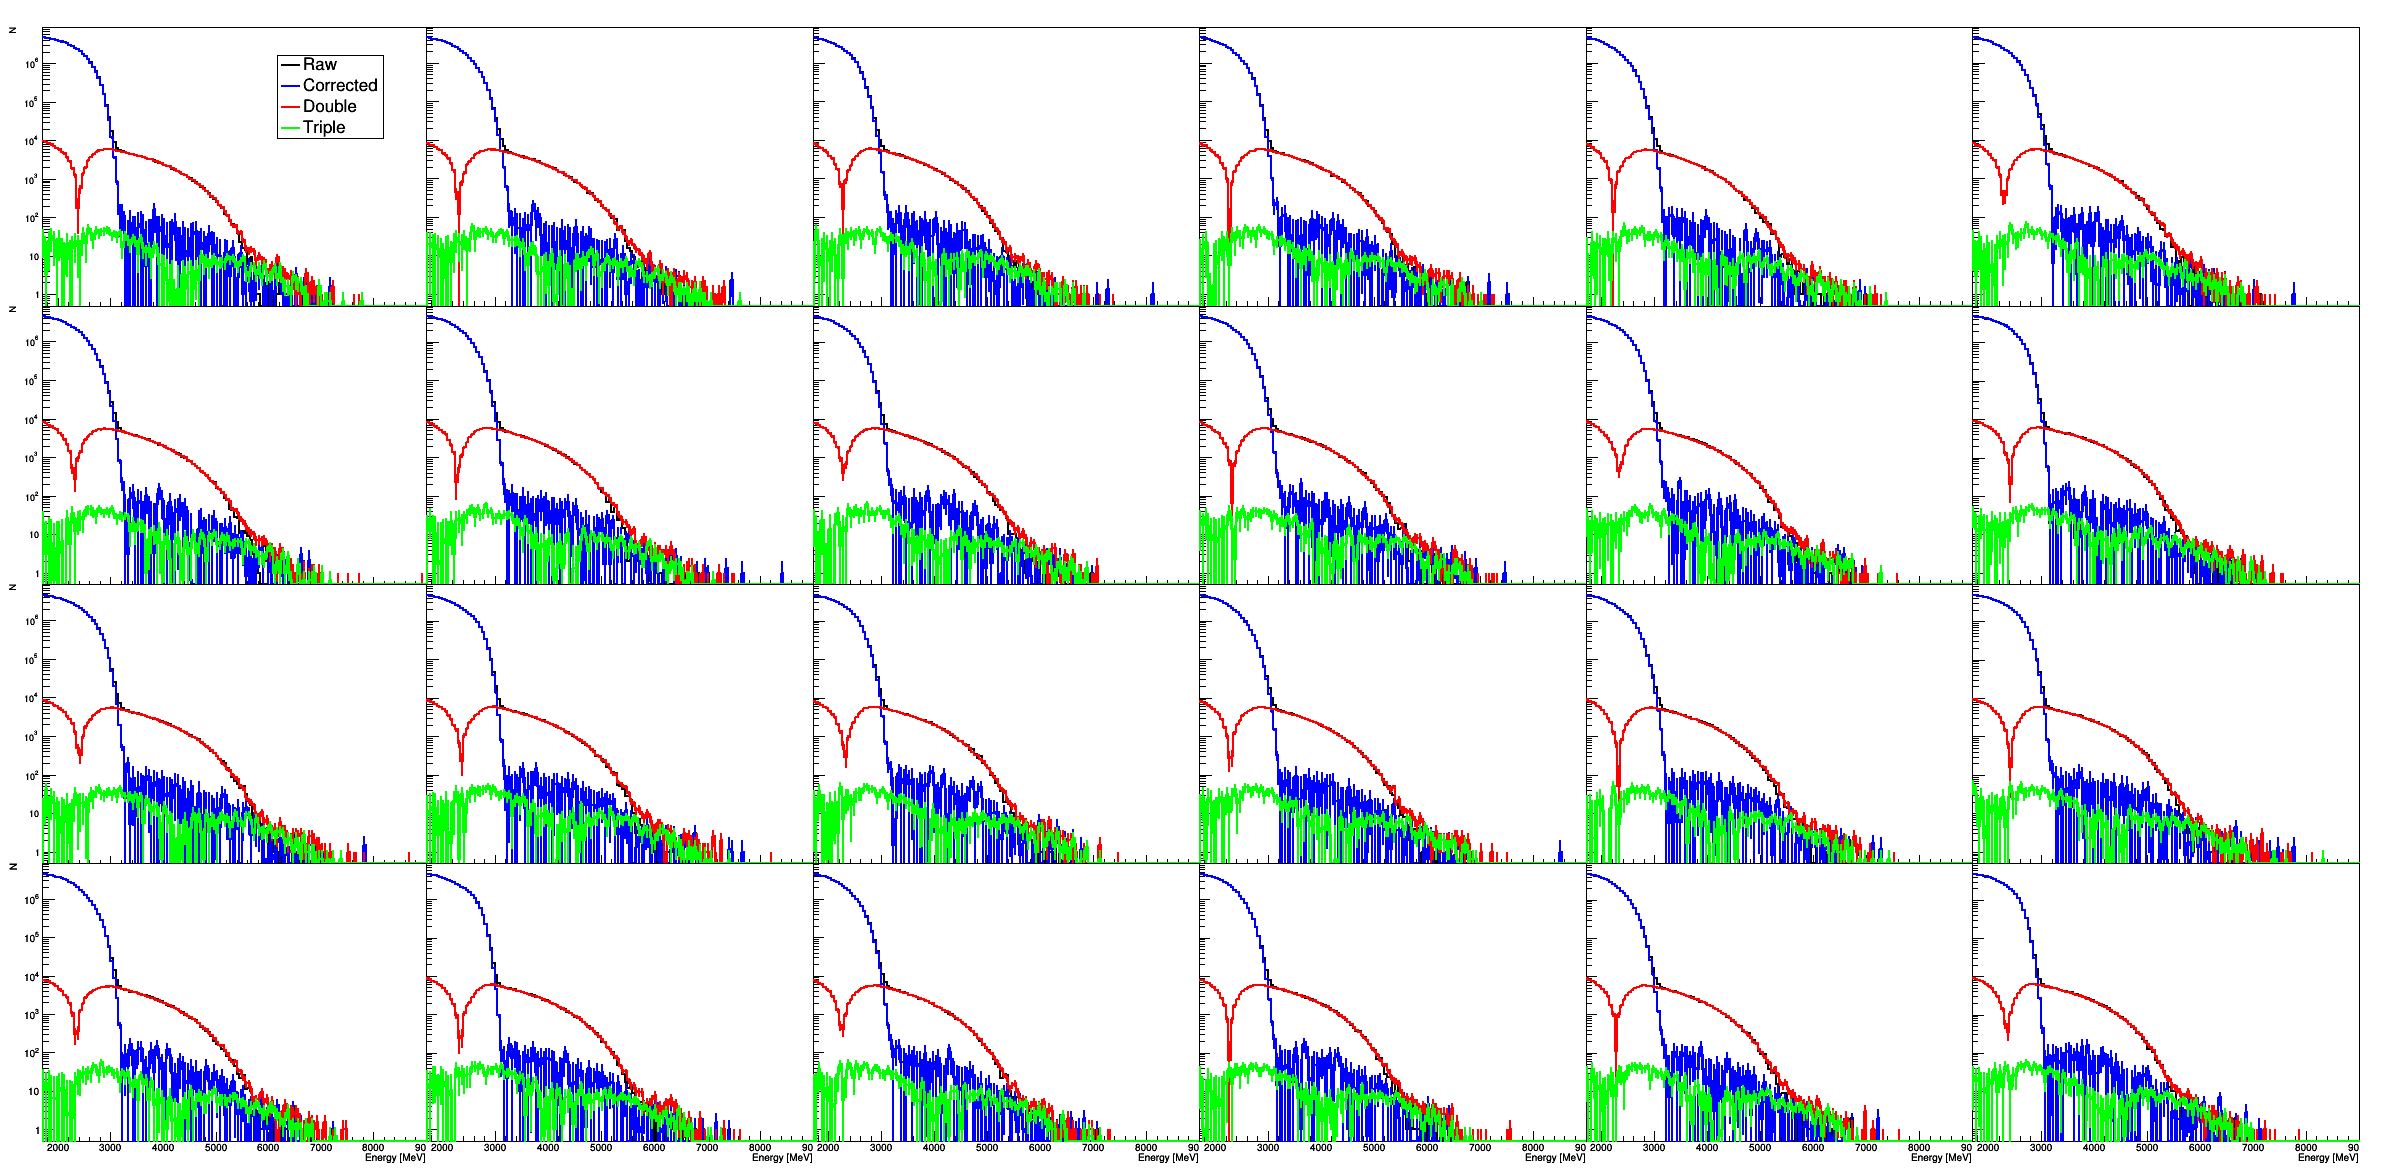

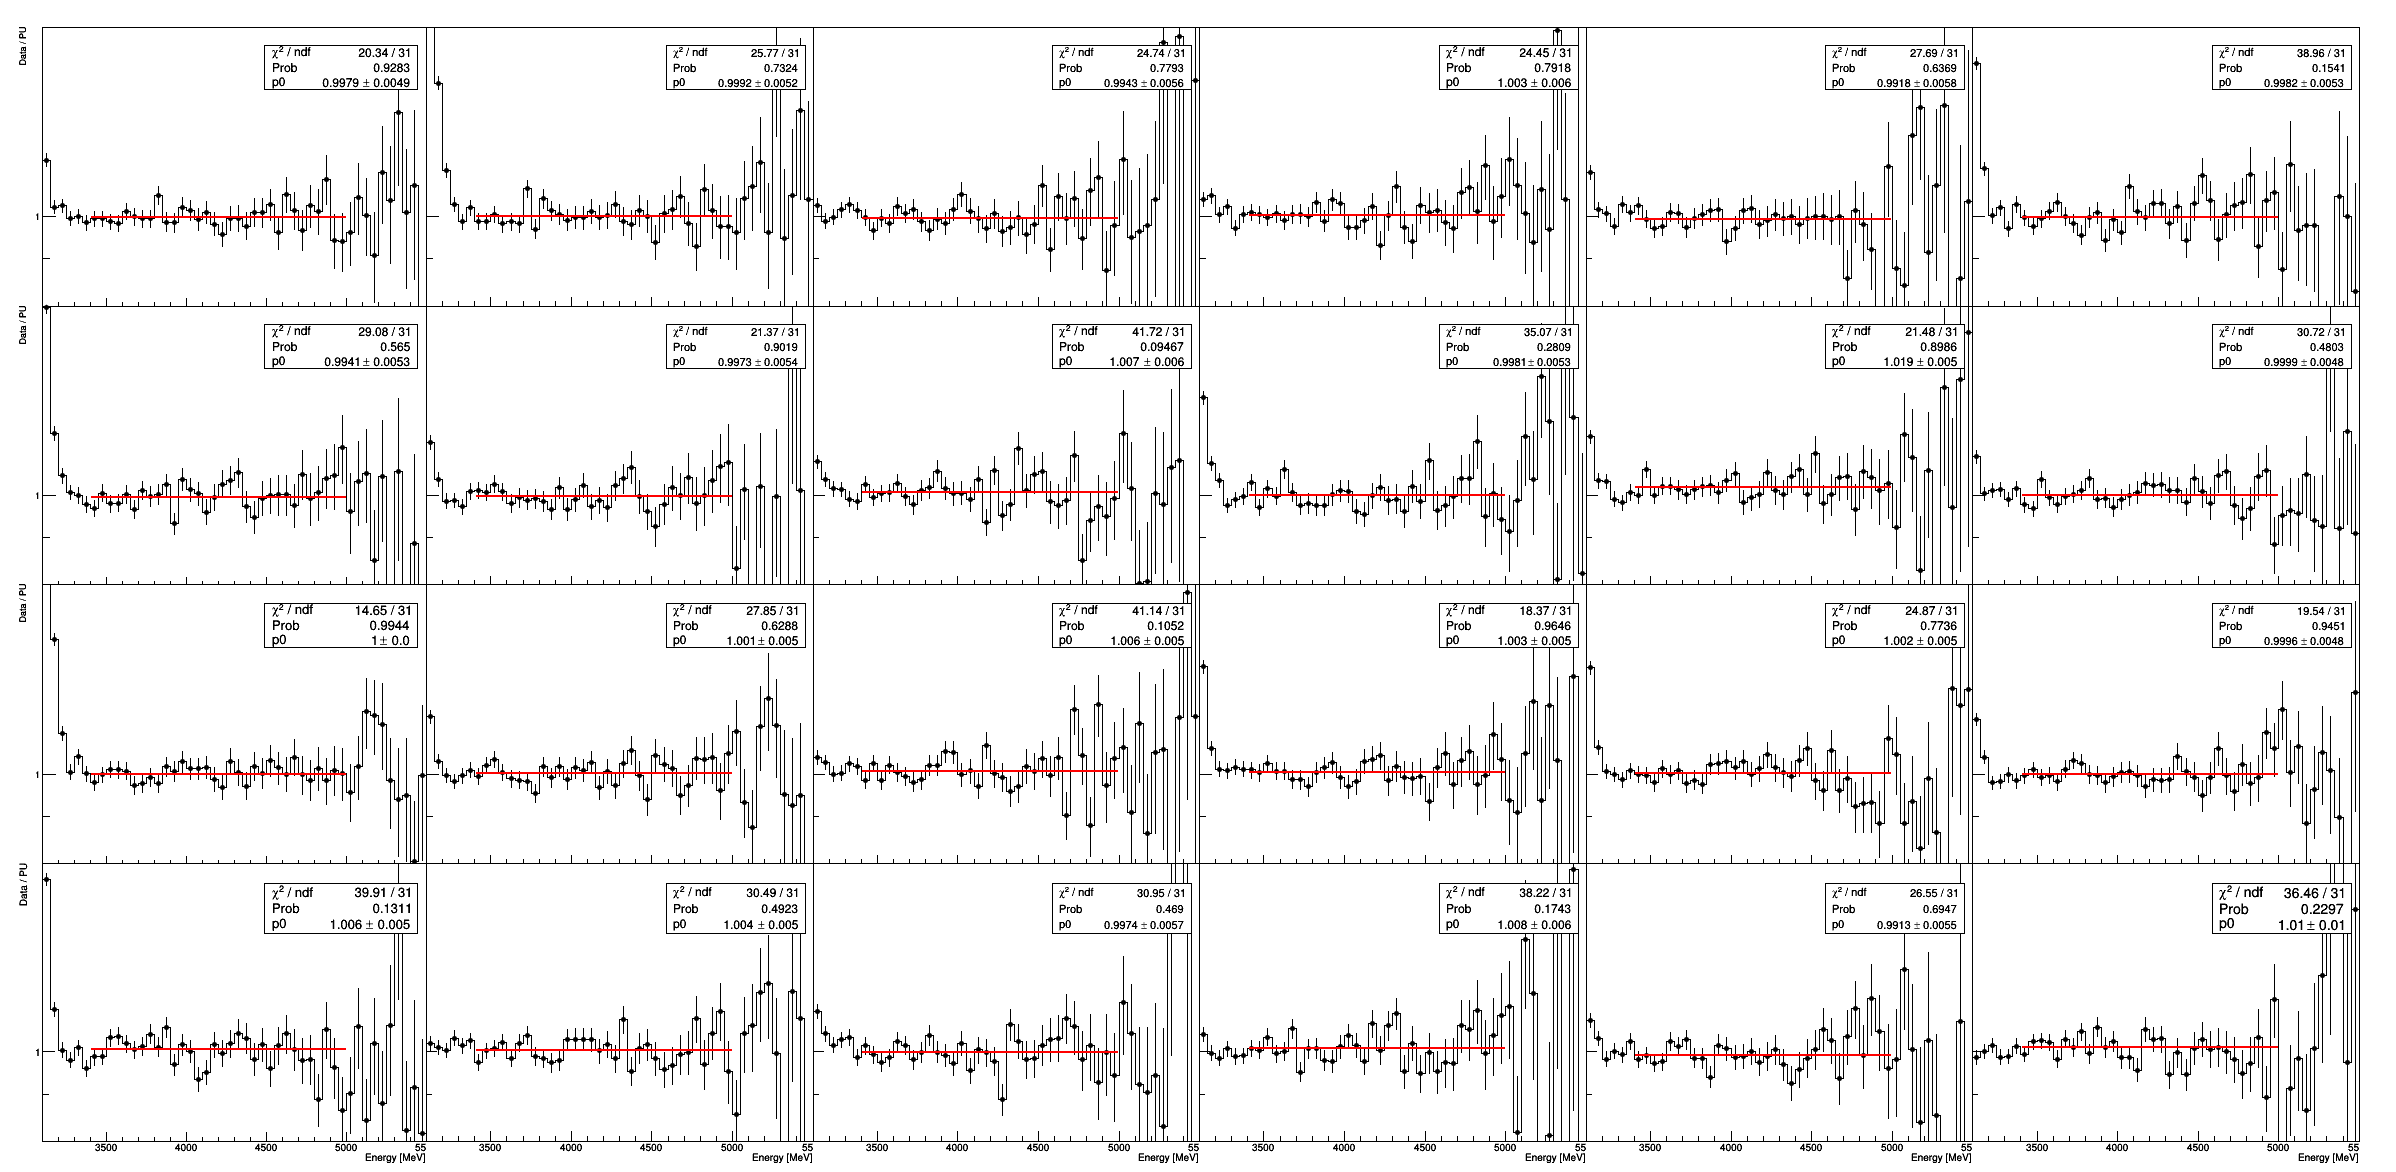

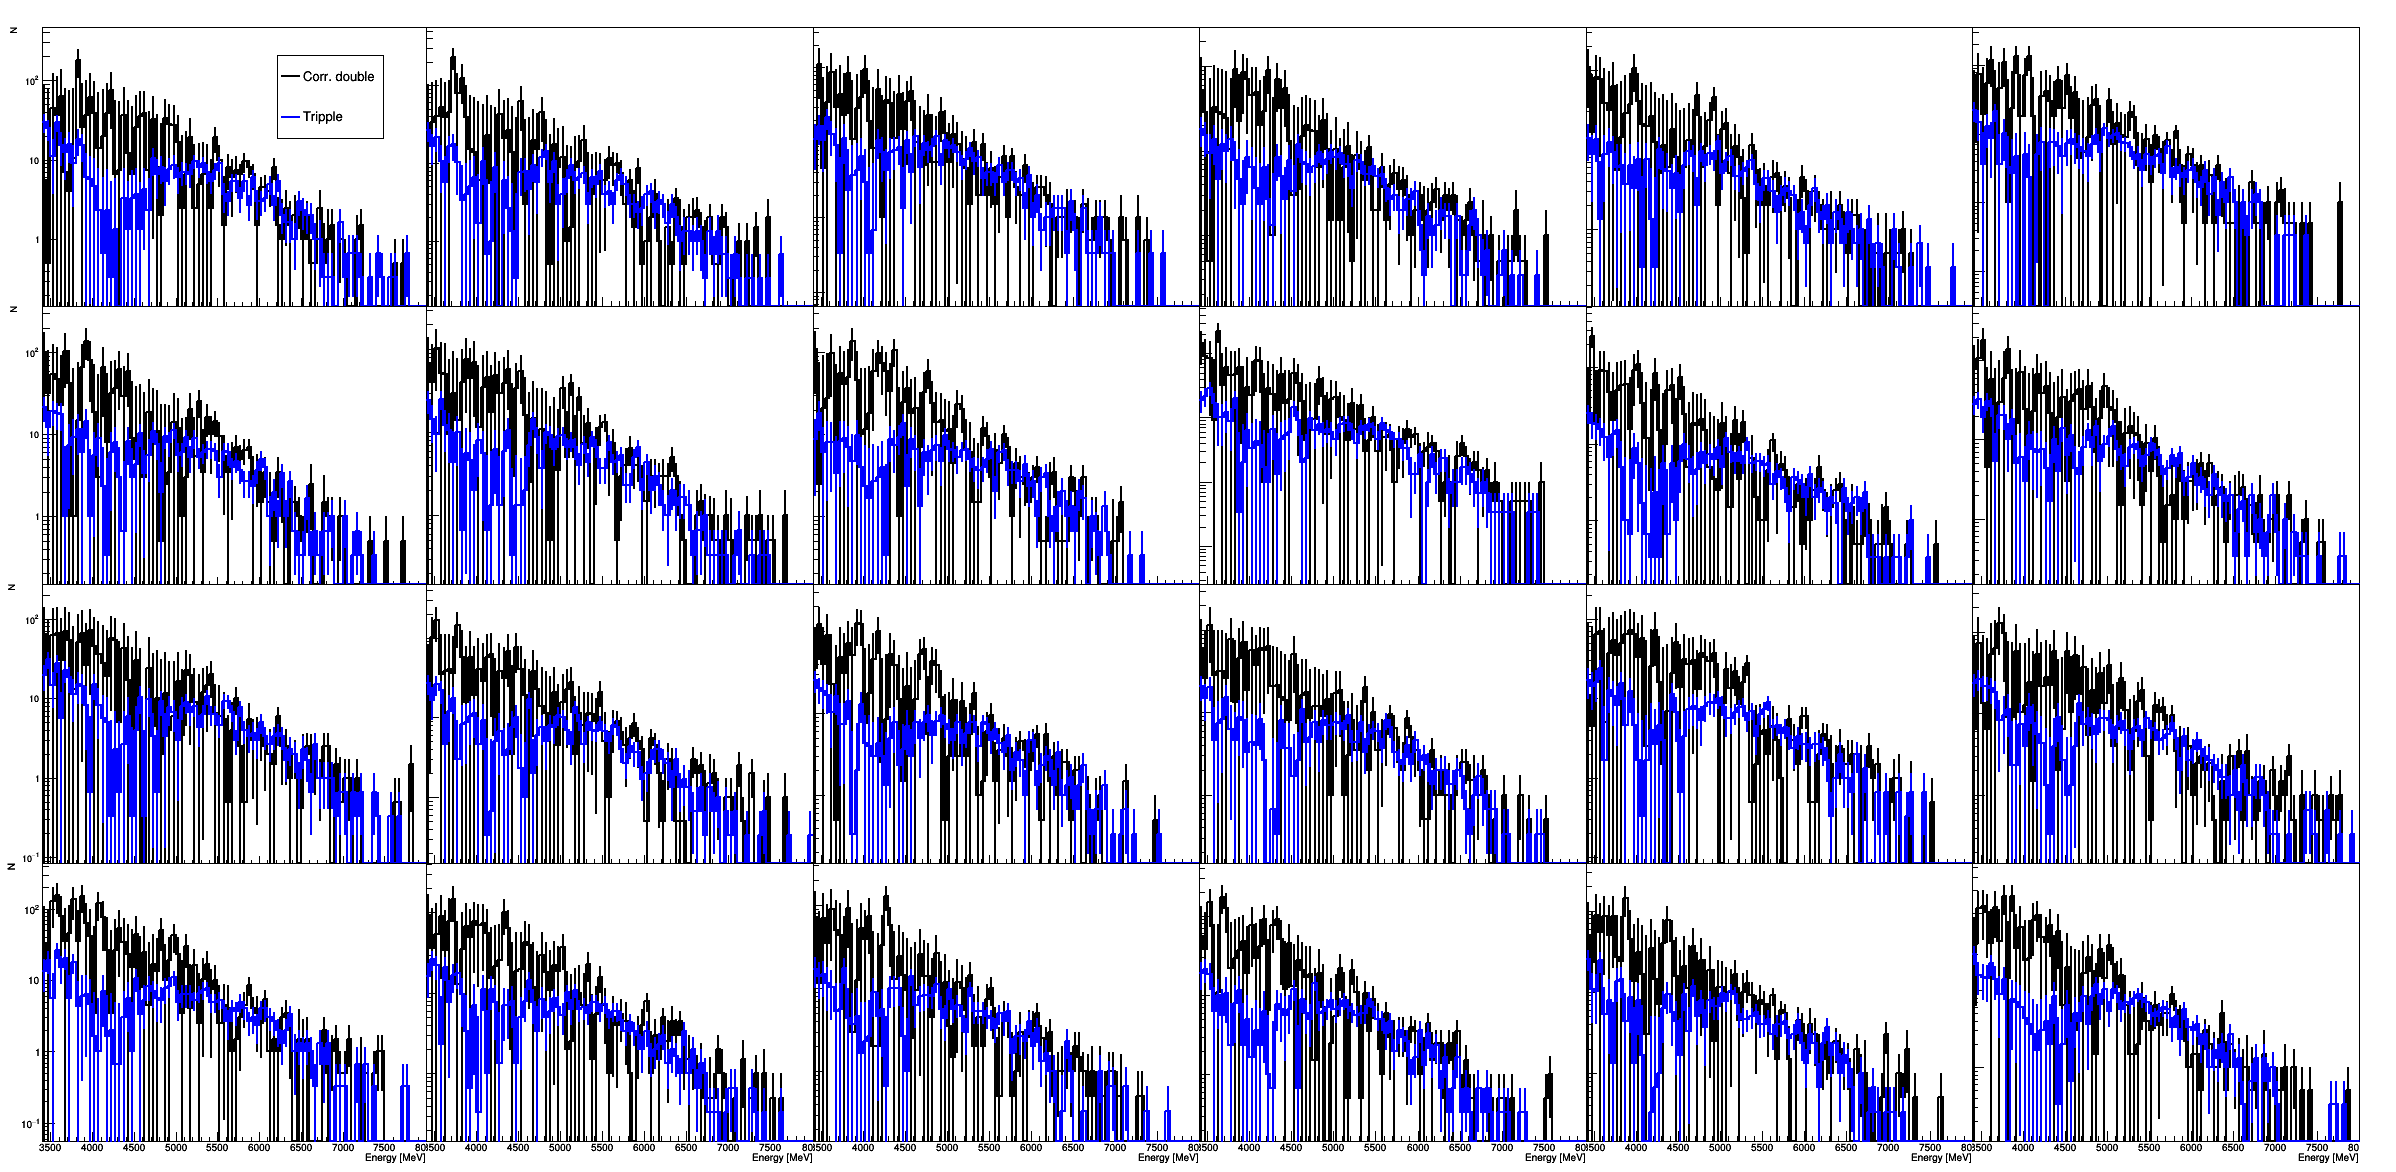

In [21]:
import tools
reload(tools)
ComparePU_calos_all = tools.ComparePU_calos_all
cs = ComparePU_calos_all(hists_calos)